#  OBJECTIVE 
The objective of this project is to classify customer reviews as positive or
negative and understand the pain points of customers who write negative
reviews. By analyzing the sentiment of reviews, we aim to gain insights into
product features that contribute to customer satisfaction or dissatisfaction.

## Loading the data and importing required libraries 

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import re 

In [92]:
df=pd.read_csv(r"D:\edu\INNO\IntershipJan20124\data\reviews_data_dump\reviews_badminton\data.csv") 
df.head() 

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [93]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [94]:
df.isnull().sum() 

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [95]:
df.shape

(8518, 8)

### Basic Information About Data

- There are 8518 datapoints and 8 features. 
- There are 10 missing values in Reviewer column,Review Title column,Up votes column and Down Votes column.
- There are 50 missing value in Place of Review column
- There are 465 missing values in Month column.
- There are 8 mising values in Review text column 

##  Data cleaning and Manipulation 

In [96]:
df[df["Review Title"].isnull()] 

Reviewer Name Review Title Place of Review  Up Votes  Down Votes Month  \
8508           NaN          NaN             NaN       NaN         NaN   NaN   
8509           NaN          NaN             NaN       NaN         NaN   NaN   
8510           NaN          NaN             NaN       NaN         NaN   NaN   
8511           NaN          NaN             NaN       NaN         NaN   NaN   
8512           NaN          NaN             NaN       NaN         NaN   NaN   
8513           NaN          NaN             NaN       NaN         NaN   NaN   
8514           NaN          NaN             NaN       NaN         NaN   NaN   
8515           NaN          NaN             NaN       NaN         NaN   NaN   
8516           NaN          NaN             NaN       NaN         NaN   NaN   
8517           NaN          NaN             NaN       NaN         NaN   NaN   

                                            Review text  Ratings  
8508  No complaints about the item . Its the best on...        5  
8509  Not sure why we have charged for this product ...        1  
8510                                                NaN        1  
8511                                                NaN        1  
8512                                                NaN        2  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4

- We can see most of the columns are missing in this dataframe we can filter this to remove null values

In [97]:
df=df[~df["Review Title"].isnull()] 
df 

Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8503                  darwin   Yones Mavis 350 Blue cap   
8504                naresh g               For Mavis350   
8505              MD. Jabbar                  Very Good   
8506            Abani Behera     Don't waste your money   
8507            vishnu varma                Really Nice   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0       NaN   
4                             NaN     147.0        24.0  Apr 2016   
...                           ...       ...         ...       ...   
8503                          NaN       2.0         0.0  Apr 2016   
8504                          NaN       2.0         1.0  Aug 2016   
8505                          NaN       1.0         0.0  Sep 2016   
8506                          NaN       0.0         2.0  Sep 2016   
8507    Certified Buyer, Agartala       0.0         1.0  Sep 2016   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8503  Wrost and duplicate productDon't buy this sell...        1  
8504        Received product intact and sealedREAD MORE        5  
8505  Delivered before time but price is high from m...        3  
8506  up to the mark but same is available in market...        4  
8507                       Nice delivery speedREAD MORE        5  

[8508 rows x 8 columns]

In [98]:
df["Place of Review"]

0        Certified Buyer, Chirakkal
1        Certified Buyer, Hyderabad
2       Certified Buyer, Dharmapuri
3          Certified Buyer, Chennai
4                               NaN
                   ...             
8503                            NaN
8504                            NaN
8505                            NaN
8506                            NaN
8507      Certified Buyer, Agartala
Name: Place of Review, Length: 8508, dtype: object

In [99]:
df["Place of Review"].unique() 

array(['Certified Buyer, Chirakkal', 'Certified Buyer, Hyderabad',
       'Certified Buyer, Dharmapuri', ...,
       'Certified Buyer, Thiruppuvanam',
       'Certified Buyer, Singaperumal Koil', 'Certified Buyer, Raebareli'],
      dtype=object)

- the cities from where reviews are generated are at last of the string we can try to extract this information also 

In [100]:
df["Month"].unique() 

array(['Feb 2021', 'Apr 2021', nan, 'Apr 2016', 'Oct 2018', 'Jan 2020',
       'Aug 2018', 'May 2018', 'Jun 2020', 'Sep 2016', 'Jun 2018',
       'Mar 2021', 'Mar 2019', 'Oct 2016', 'Feb 2018', 'May 2021',
       'Aug 2020', 'Feb 2019', 'May 2020', 'Jul 2018', 'Nov 2020',
       'Mar 2020', 'Jan 2022', 'Jan 2021', 'May 2017', 'Nov 2018',
       'Dec 2018', 'Oct 2022', 'Sep 2022', 'Nov 2021', 'Oct 2021',
       'Aug 2021', 'Jun 2021', 'Sep 2020', 'Jul 2020', 'Dec 2019',
       'Sep 2019', 'Jun 2019', 'Apr 2019', 'Jan 2019', 'Sep 2017',
       'Jan 2018', 'Dec 2017', 'Oct 2017', 'Apr 2018', 'Dec 2021',
       'Dec 2020', 'Mar 2018', 'Jul 2017', 'May 2019', 'Nov 2019',
       'Jul 2019', 'Nov 2022', 'Jul 2022', 'May 2022', 'Mar 2022',
       'Feb 2022', 'Jul 2021', 'Feb 2020', 'Aug 2019', 'Sep 2018',
       'Nov 2017', 'Feb 2017', 'Jun 2017', 'Aug 2016', 'Dec 2016',
       'Mar 2017', 'Jan 2017', 'Aug 2017', 'Aug 2022', 'Jun 2022',
       'Apr 2022', 'Sep 2021', 'Oct 2020', 'Apr 2020', 'O

- From unique values of month we can see that month is first and year is the last text 

In [101]:
for i in df["Month"]:
    print(i,end=",")

Feb 2021,Feb 2021,Apr 2021,nan,Apr 2016,Oct 2018,Jan 2020,Oct 2018,Aug 2018,May 2018,Jun 2020,Sep 2016,Jun 2018,Mar 2021,Mar 2019,Oct 2016,Feb 2018,May 2021,Aug 2020,Feb 2019,Jun 2018,Mar 2021,May 2020,Jul 2018,May 2018,Oct 2018,Apr 2021,Feb 2021,Nov 2020,Jun 2018,Jul 2018,Mar 2020,nan,nan,nan,Jan 2022,Mar 2021,Feb 2021,Jan 2021,May 2017,Mar 2019,Nov 2018,Aug 2018,Dec 2018,nan,Oct 2022,Sep 2022,Nov 2021,Oct 2021,Aug 2021,Jun 2021,Jun 2021,Jun 2021,Jun 2021,Jun 2021,Jun 2021,May 2021,May 2021,May 2021,May 2021,May 2021,May 2021,Apr 2021,Apr 2021,Apr 2021,Apr 2021,Apr 2021,Apr 2021,Apr 2021,Apr 2021,Feb 2021,Feb 2021,Jan 2021,Jan 2021,Sep 2020,Aug 2020,Jul 2020,Jul 2020,Jul 2020,Mar 2020,Dec 2019,Sep 2019,Jun 2019,Apr 2019,Apr 2019,Feb 2019,Feb 2019,Jan 2019,Jan 2019,Dec 2018,May 2018,Sep 2017,Jan 2018,Jan 2018,Dec 2017,Oct 2017,Apr 2018,Jan 2019,May 2018,May 2018,Apr 2018,Feb 2018,Sep 2017,Jan 2022,Dec 2021,Feb 2021,Dec 2020,Feb 2019,Jul 2018,Apr 2019,Mar 2018,May 2017,Oct 2018,Jun 2021

In [102]:
##filling null values in Place of Review 
df["Place of Review"]=df["Place of Review"].fillna("unavailable")


##extracting cities from the column Place of review
df["City of Review"]=df["Place of Review"].apply(lambda x:x.split(",")[-1])
 
## fiiling nan with unavailable 1000 because it is the same format with month and year
df["Month"]=df["Month"].replace(np.nan,"unavailable 1000")

##separating month and year 

df["ReviewMonth"]=df["Month"].apply(lambda x:x.split()[0])
df["ReviewYear"]=df["Month"].apply(lambda x:x.split()[-1])
df["ReviewYear"]=df["ReviewYear"].astype("int64")

##making new column containing length of words present in review 
df["ReviewLength"]=df["Review text"].apply(lambda x:len(x.split()))


##converting ratings into positive and negative 
def sentiment(rating):
    if rating>3:
        sent="positive"
    elif rating<3:
        sent="negative"
    else:
        sent="neutral" 
    return sent

df["Sentiment"]=df["Ratings"].apply(sentiment)



df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes             Month  \
0   Certified Buyer, Chirakkal     889.0        64.0          Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0          Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0          Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0  unavailable 1000   
4                  unavailable     147.0        24.0          Apr 2016   

                                         Review text  Ratings City of Review  \
0  Nice product, good quality, but price is now r...        4      Chirakkal   
1  They didn't supplied Yonex Mavis 350. Outside ...        1      Hyderabad   
2  Worst product. Damaged shuttlecocks packed in ...        1     Dharmapuri   
3  Quite O. K. , but nowadays  the quality of the...        3        Chennai   
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1    unavailable   

   ReviewMonth  ReviewYear  ReviewLength Sentiment  
0          Feb        2021            37  positive  
1          Feb        2021            20  negative  
2          Apr        2021            24  negative  
3  unavailable        1000            81   neutral  
4          Apr        2016            17  negative

### Steps in Data Cleaning and Manipulation 

- We removed the datapoints containing null values in Review Title column
- Obtained city of review by extracting only city from the the Place of review column
- Extracted month and year separately from month column 
- Created the Review length column that contained the number of words in a review
- Created a new column that represents each review as either positive,negative or neutral on the basis of ratings.

## Exploratory Data Analysis 

In [103]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings', 'City of Review',
       'ReviewMonth', 'ReviewYear', 'ReviewLength', 'Sentiment'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 8507
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8508 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8508 non-null   object 
 6   Review text      8508 non-null   object 
 7   Ratings          8508 non-null   int64  
 8   City of Review   8508 non-null   object 
 9   ReviewMonth      8508 non-null   object 
 10  ReviewYear       8508 non-null   int64  
 11  ReviewLength     8508 non-null   int64  
 12  Sentiment        8508 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 930.6+ KB


### Univariate Analysis

In [105]:
for col in ['City of Review','ReviewMonth', 'ReviewYear', 'Ratings', 'Sentiment']:
    print(f"for column {col} the value counts are :\n",df[col].value_counts().nlargest(10))
    print("==============================================") 

for column City of Review the value counts are :
 City of Review
Bengaluru                 319
Hyderabad                 251
Chennai                   240
Bangalore                 212
New Delhi                 155
Visakhapatnam             109
Pune                       84
Mumbai                     56
Lucknow                    55
East Godavari District     51
Name: count, dtype: int64
for column ReviewMonth the value counts are :
 ReviewMonth
Oct    847
Dec    774
Jan    747
Nov    683
Mar    674
May    659
Feb    638
Aug    631
Sep    631
Jun    621
Name: count, dtype: int64
for column ReviewYear the value counts are :
 ReviewYear
2020    1918
2021    1774
2018    1606
2019    1356
2017     782
2022     561
1000     455
2016      54
2015       2
Name: count, dtype: int64
for column Ratings the value counts are :
 Ratings
5    5078
4    1744
1     765
3     615
2     306
Name: count, dtype: int64
for column Sentiment the value counts are :
 Sentiment
positive    6822
negative    107

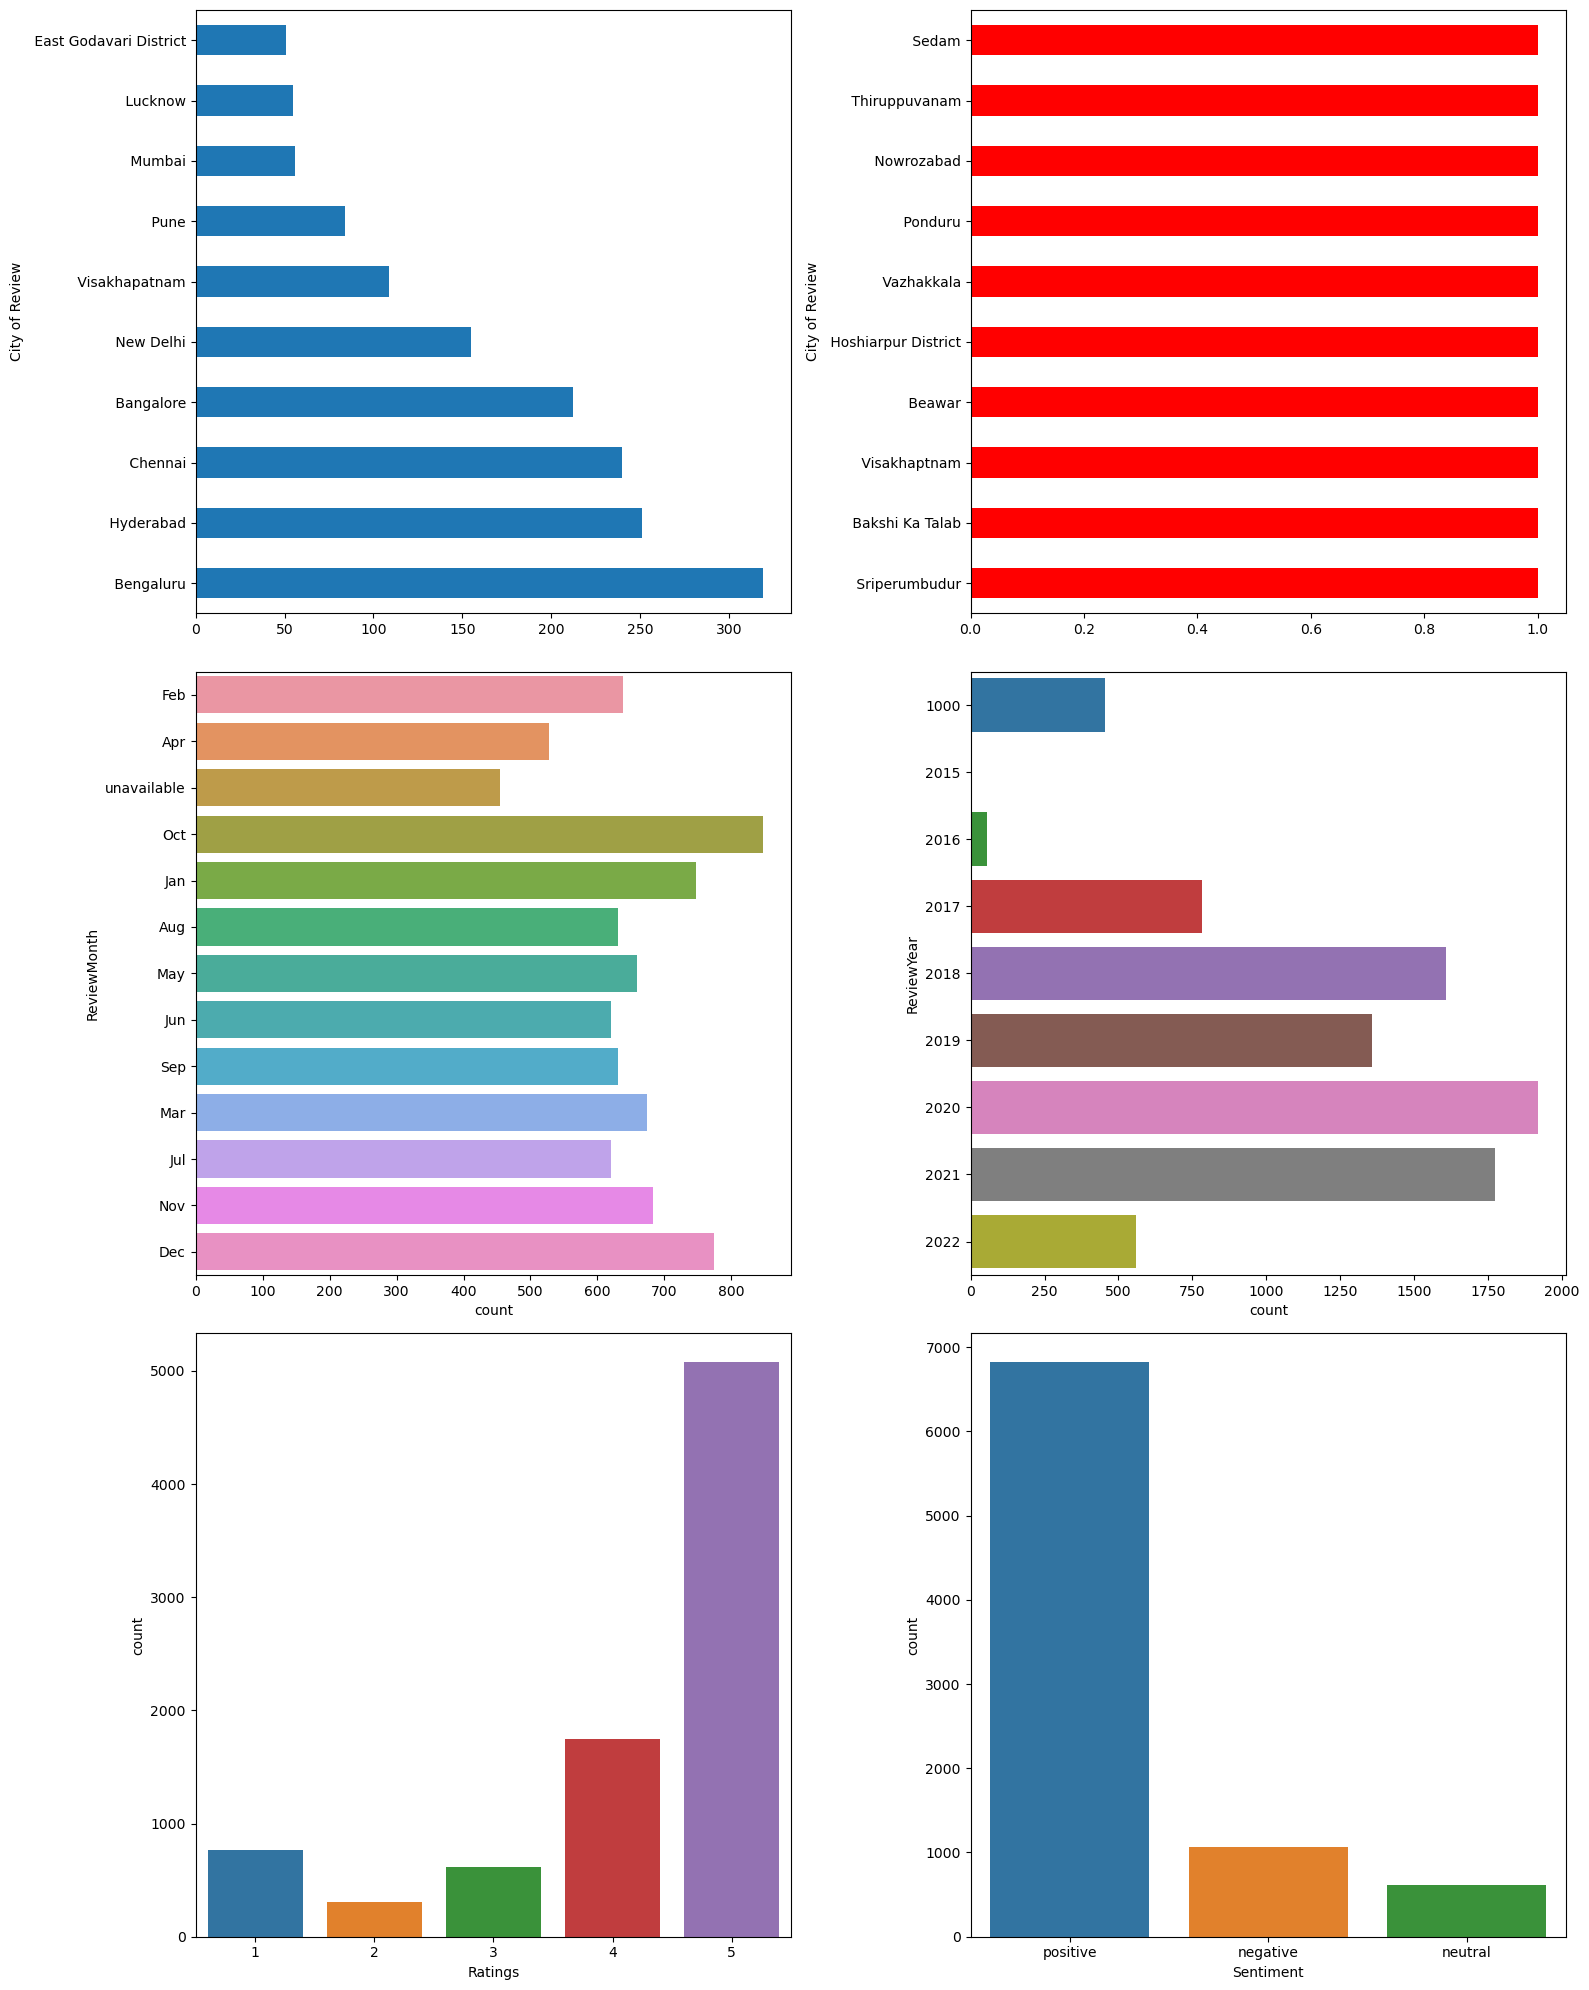

In [106]:
#Analyzing City of Review,RviewMonth,Review Year,rating,Sentiment column 

plt.figure(figsize=(16,20))

#city with largest number of reviews
plt.subplot(3,2,1)
df["City of Review"].value_counts().nlargest(10).plot(kind="barh") 

#city with smalest number of reviews
plt.subplot(3,2,2)
df["City of Review"].value_counts().nsmallest(10).plot(kind="barh",color="red") 

##Month column 
plt.subplot(3,2,3)
sns.countplot(data=df,y="ReviewMonth")

##Year
plt.subplot(3,2,4)
sns.countplot(data=df,y="ReviewYear")

##rating
plt.subplot(3,2,5)
sns.countplot(data=df,x="Ratings")

##sentiments
plt.subplot(3,2,6)
sns.countplot(data=df,x="Sentiment")

plt.tight_layout()

In [107]:
for col in ['Up Votes','Down Votes','ReviewLength']:
    print(f"The mean value of {col} column is : ",df[col].mean())
    print(f"The median value of {col} column is : ",df[col].median())
    print(f"The standard deviation  of {col} column is : ",df[col].std())
    print(f"The maximum value of {col} column is : ",df[col].max())
    print(f"The minimum value of {col} column is : ",df[col].min())
    print("============================================") 
    
    

The mean value of Up Votes column is :  0.3913963328631876
The median value of Up Votes column is :  0.0
The standard deviation  of Up Votes column is :  11.61390885234496
The maximum value of Up Votes column is :  889.0
The minimum value of Up Votes column is :  0.0
The mean value of Down Votes column is :  0.12176774800188059
The median value of Down Votes column is :  0.0
The standard deviation  of Down Votes column is :  3.2480220421369954
The maximum value of Down Votes column is :  219.0
The minimum value of Down Votes column is :  0.0
The mean value of ReviewLength column is :  6.296897038081806
The median value of ReviewLength column is :  3.0
The standard deviation  of ReviewLength column is :  7.695663220702064
The maximum value of ReviewLength column is :  96
The minimum value of ReviewLength column is :  2


<Axes: xlabel='ReviewLength', ylabel='Count'>

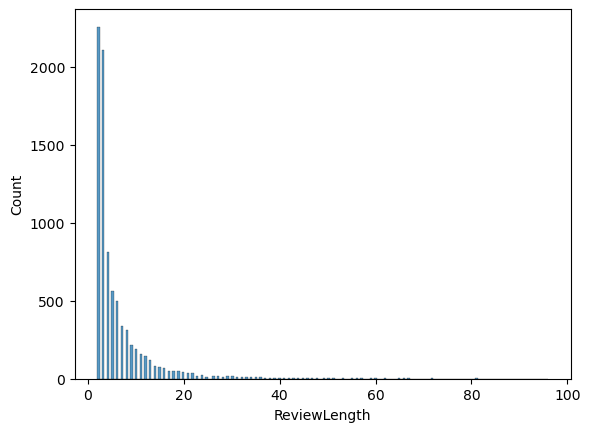

In [108]:
sns.histplot(df["ReviewLength"])  

<Axes: ylabel='Down Votes'>

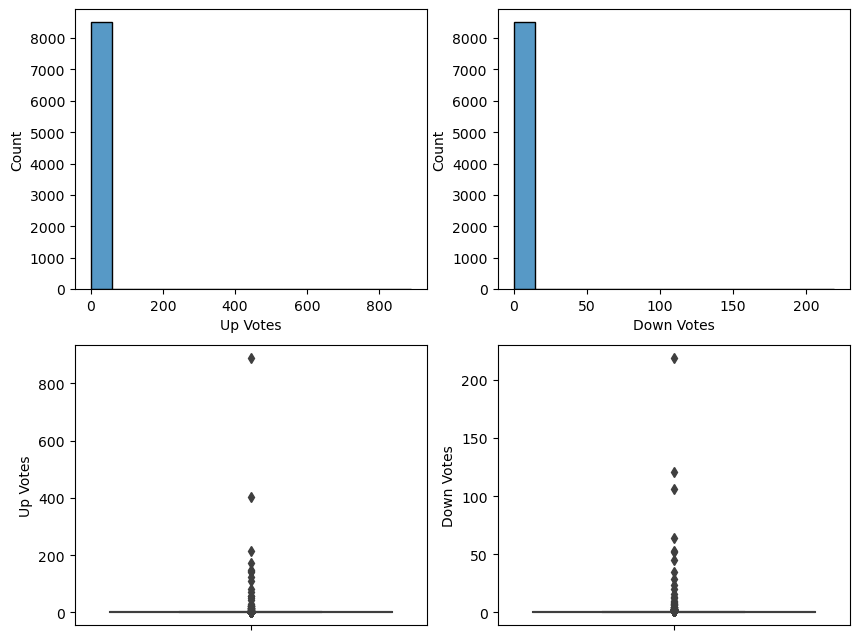

In [109]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1) 
sns.histplot(df["Up Votes"])

plt.subplot(2,2,2) 
sns.histplot(df["Down Votes"])  

plt.subplot(2,2,3)
sns.boxplot(data=df,y="Up Votes")

plt.subplot(2,2,4)
sns.boxplot(data=df,y="Down Votes")


#### Bivariate Analysis 

<Axes: xlabel='Sentiment', ylabel='ReviewLength'>

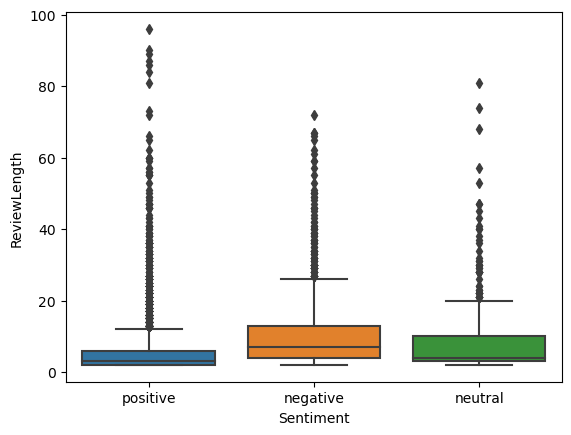

In [110]:
##between sentiment and length of words
sns.boxplot(data=df,x="Sentiment",y="ReviewLength")  

<Axes: xlabel='Sentiment', ylabel='Up Votes'>

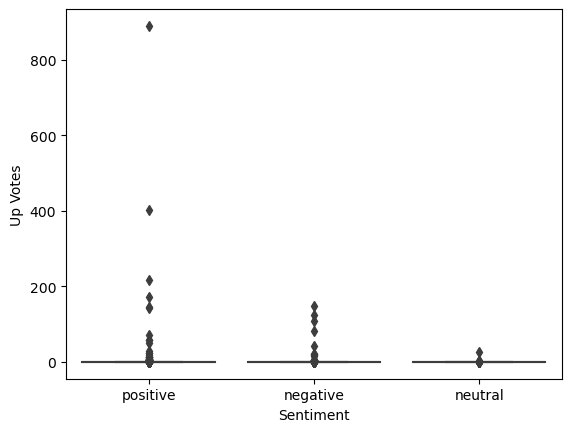

In [111]:
##between sentiment and year
sns.boxplot(data=df,x="Sentiment",y="Up Votes")  

<Axes: xlabel='Sentiment', ylabel='Down Votes'>

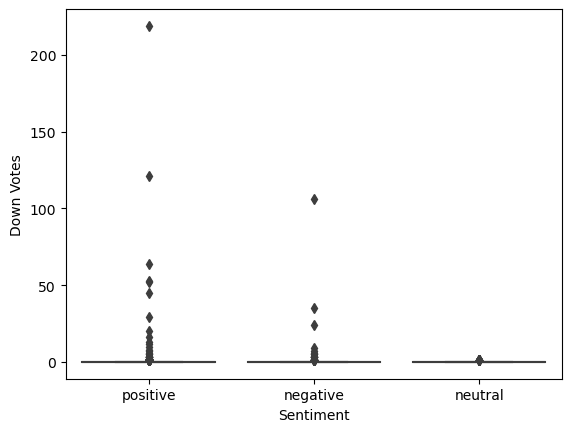

In [112]:
##between sentiment and year
sns.boxplot(data=df,x="Sentiment",y="Down Votes")  

In [113]:
q1=df["Up Votes"].quantile(0.75)
q1

0.0

In [114]:
df["Up Votes"].unique() 

array([889., 109.,  42.,  25., 147., 173., 403.,  59.,  14.,  50.,  57.,
       146., 142.,  22.,  23.,  71.,  81.,   5.,  12.,  30.,  11.,   4.,
        13.,  19.,   3.,   6.,   9., 216.,   2.,   8.,   1.,   0.,  17.,
       124.,  24.,   7.,  15.])

In [115]:
df["Down Votes"].unique()  

array([ 64.,   6.,   3.,   1.,  24.,  45., 121.,  13.,  12.,  16.,  52.,
        53.,   5.,  29.,  35.,   0.,  10.,   8., 219.,   2.,   4.,   7.,
       106.,  20.,   9.])

In [116]:
(df["Up Votes"]==0.).sum()

8283

In [117]:
(df["Down Votes"]==0.).sum()

8372

#### WordCloud review

In [118]:
##creating positive and negative dataframe for visualizing important words 
positive=df[df["Sentiment"]=="positive"]
negative=df[df["Sentiment"]=="negative"]


In [119]:
#pip install wordcloud


In [120]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Review text"]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(positive))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(negative))

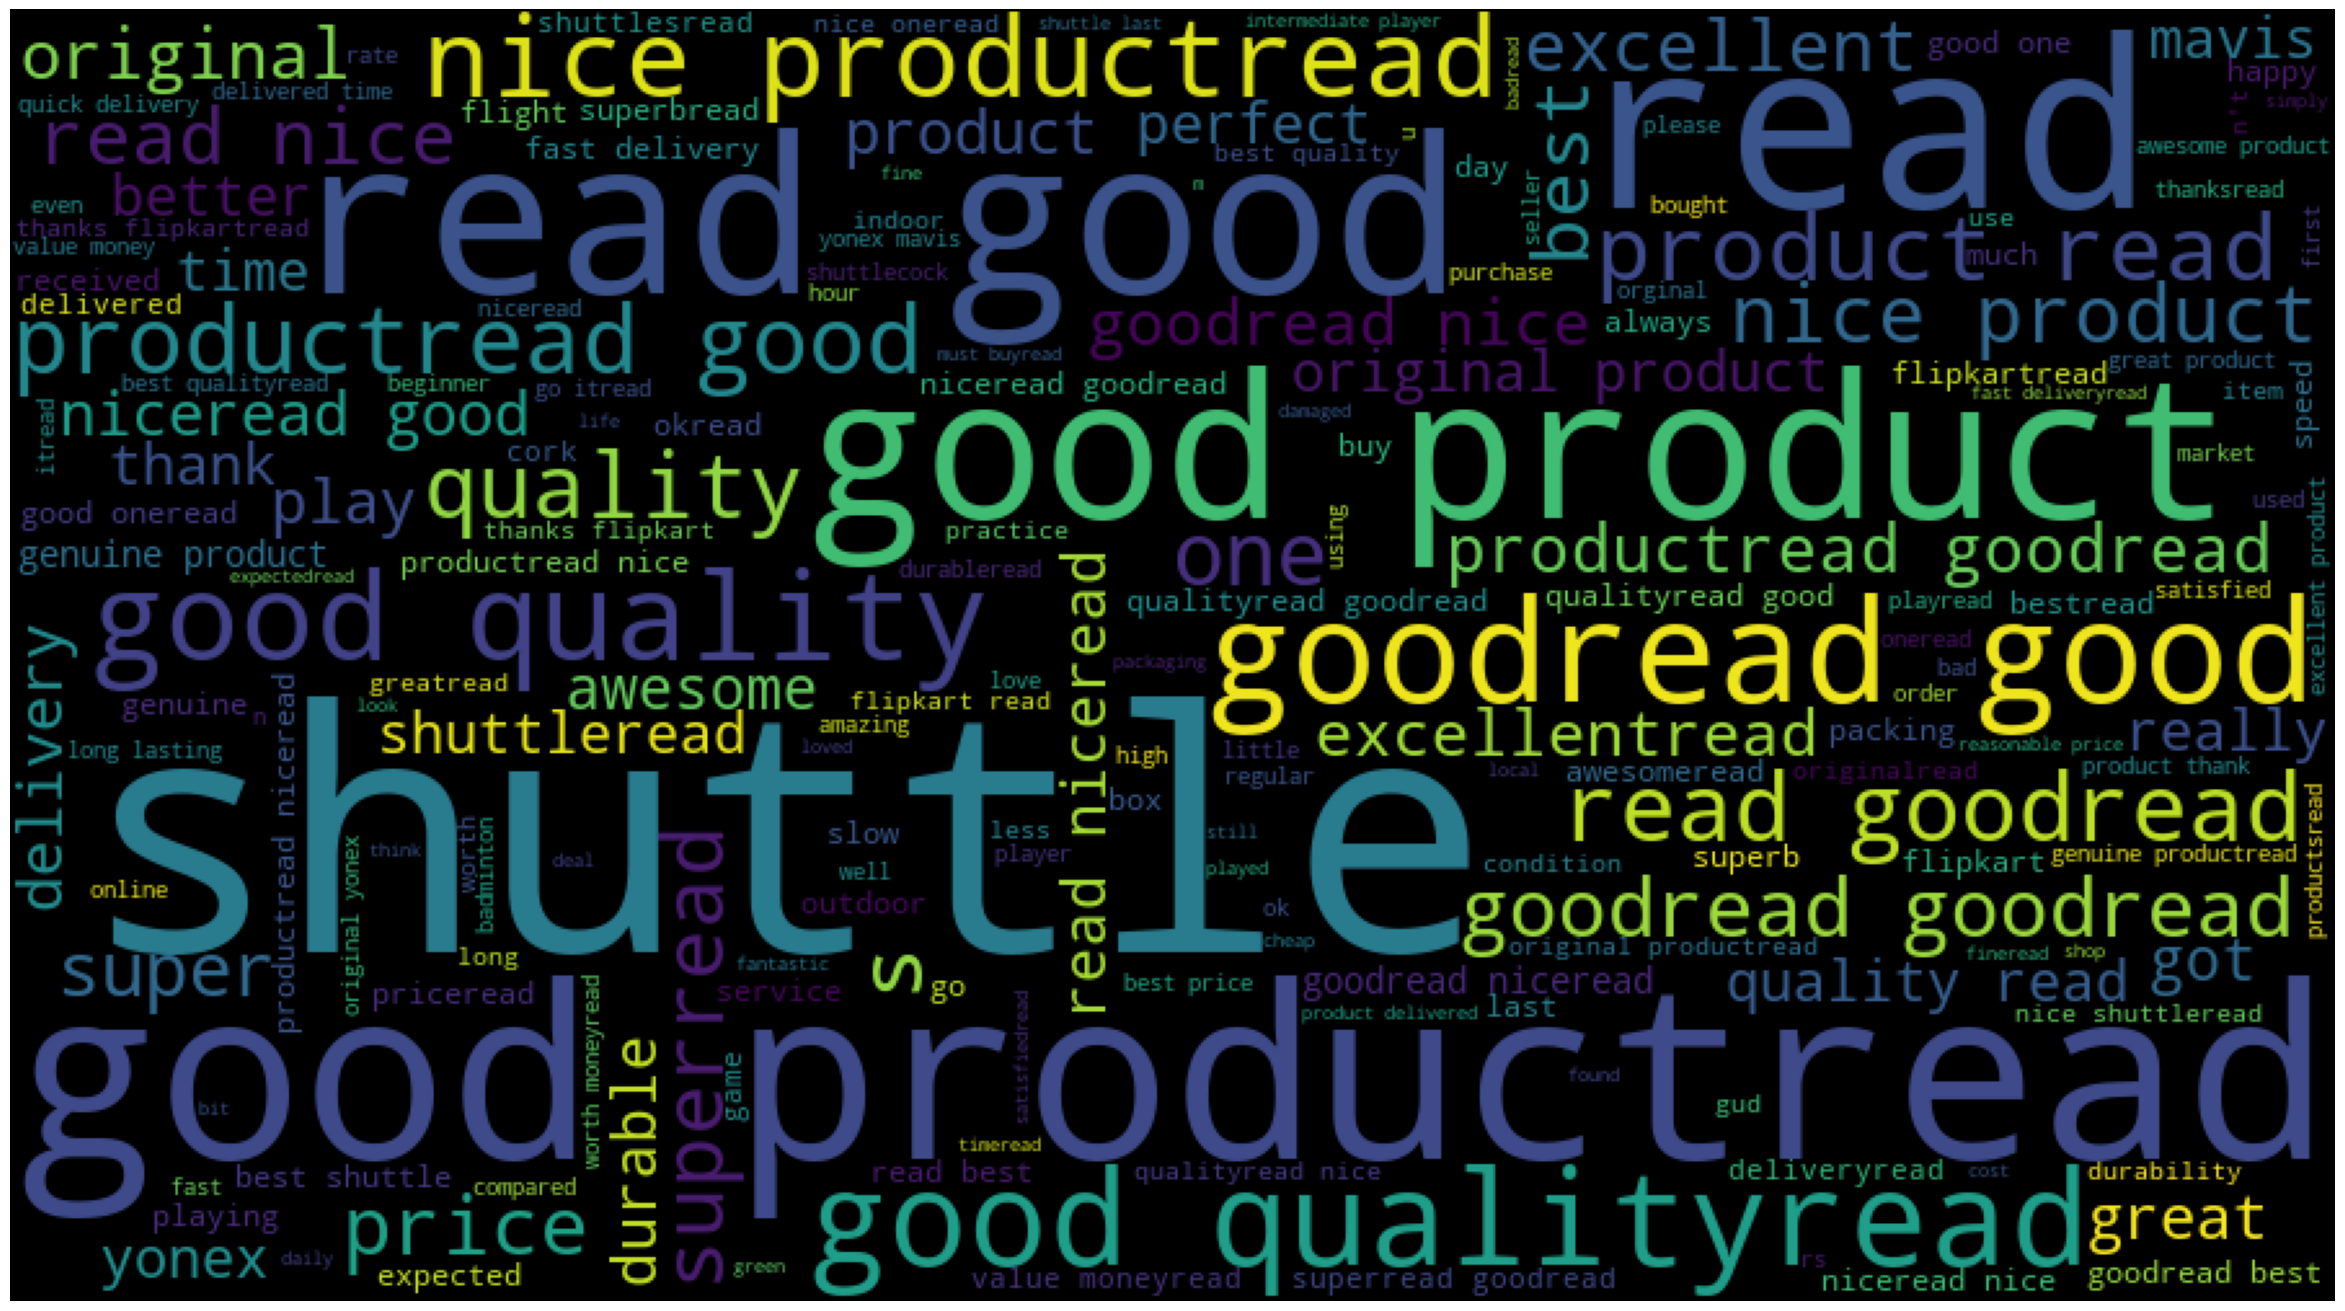

In [121]:
plt.figure(1,figsize=(30,20))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show() 

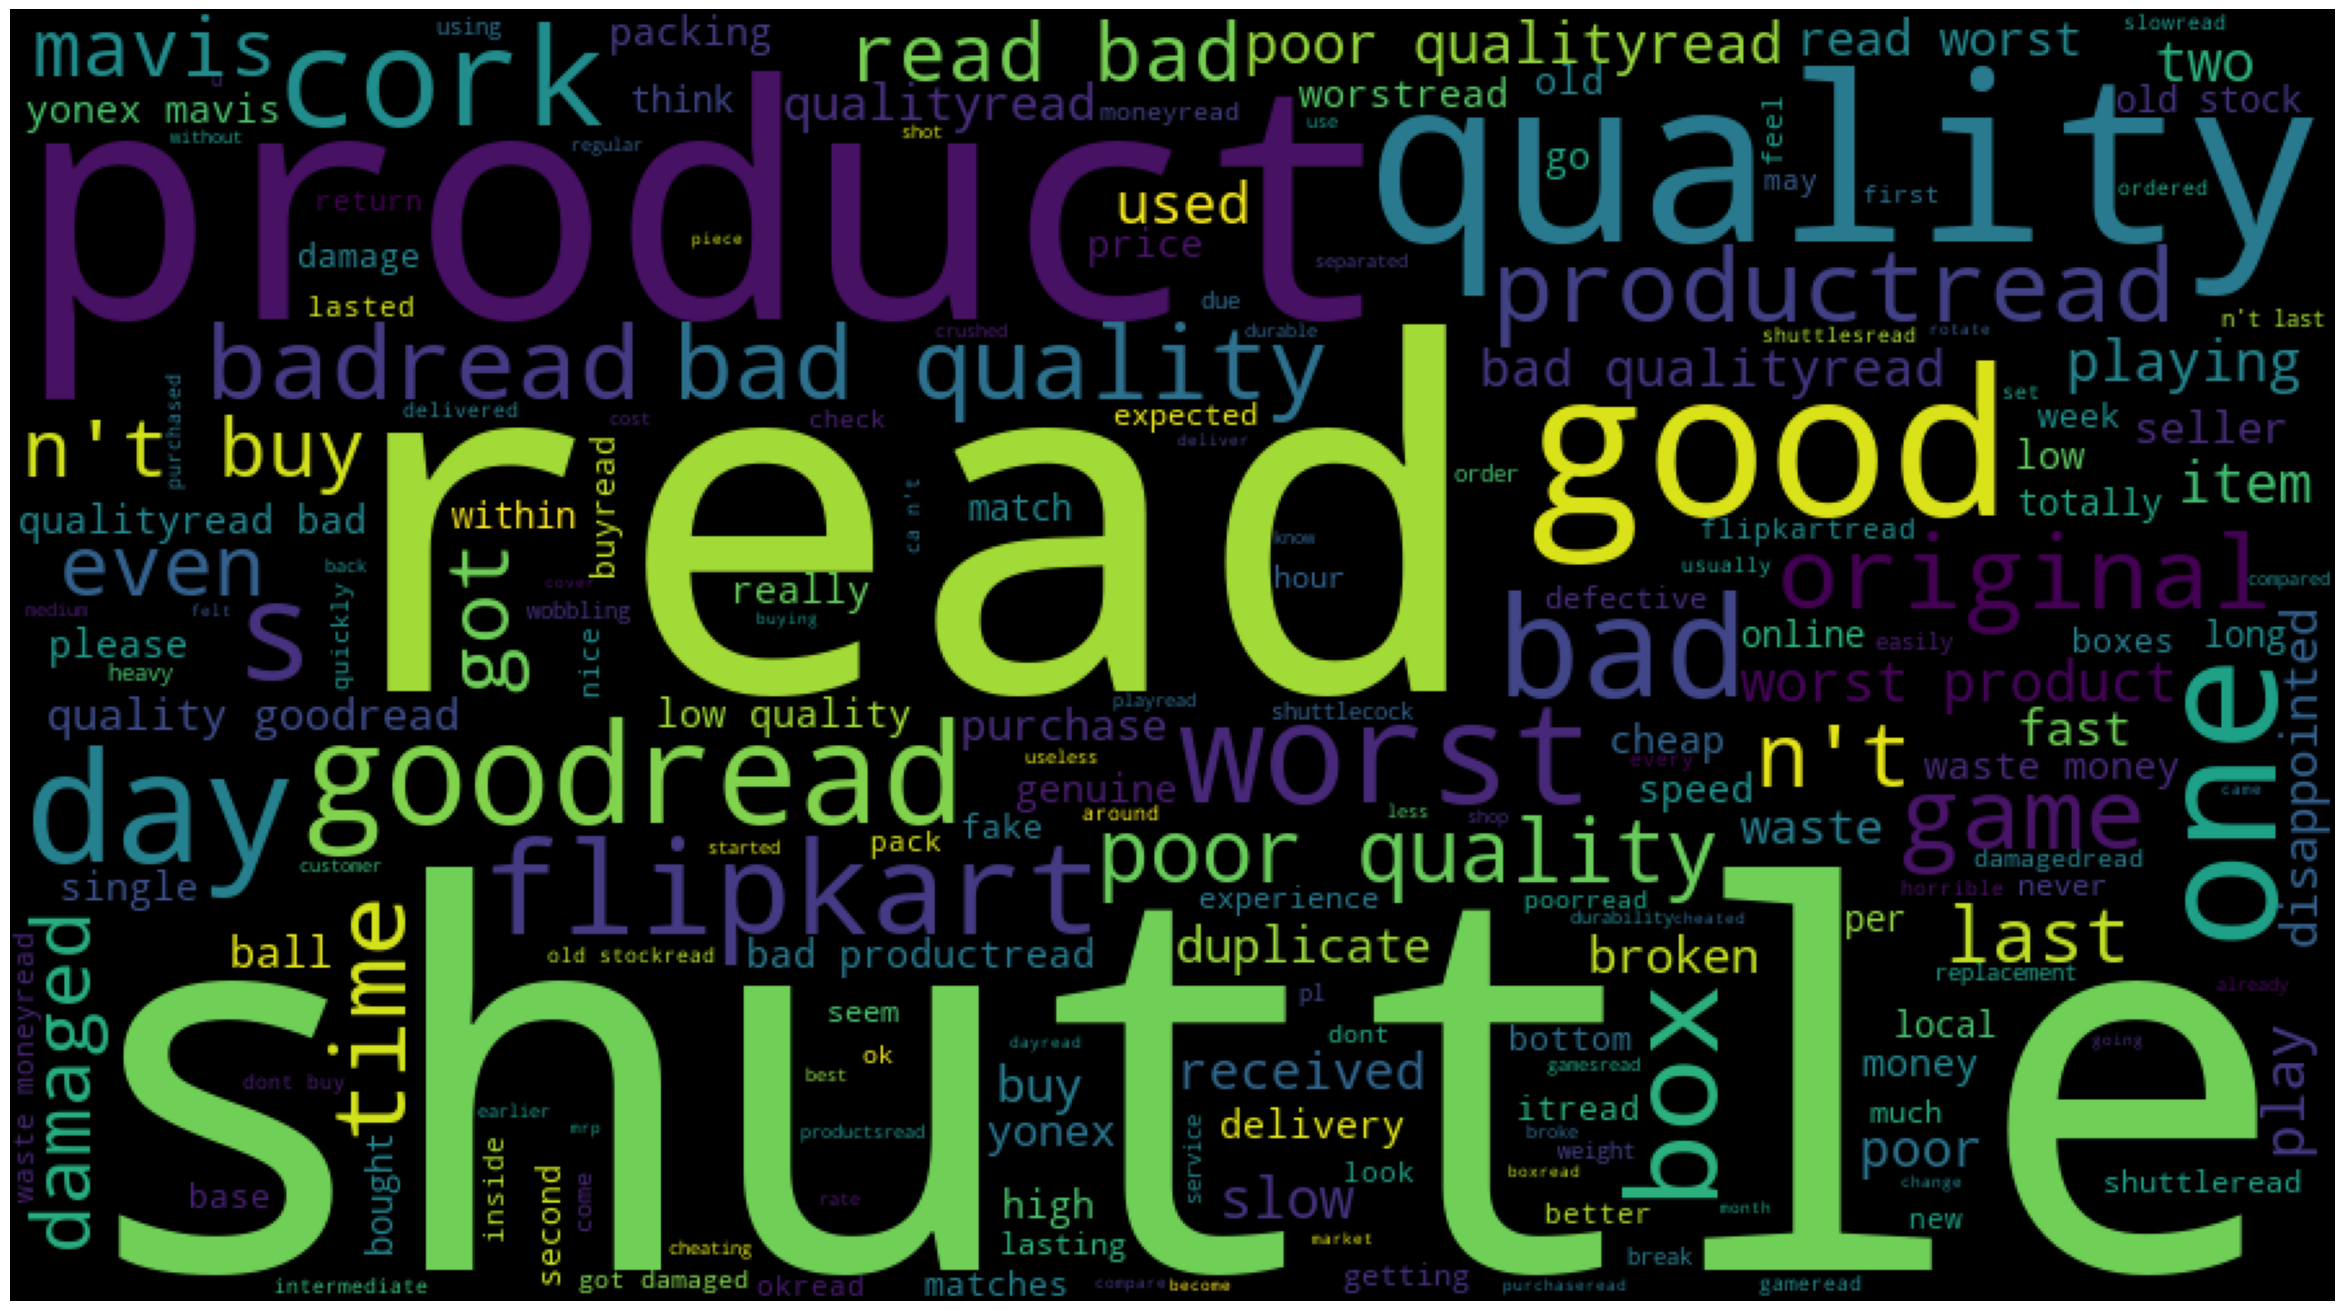

In [122]:
plt.figure(1,figsize=(30,20))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show() 

In [123]:
##doing same for review title 
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Review Title"]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(positive))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(negative))

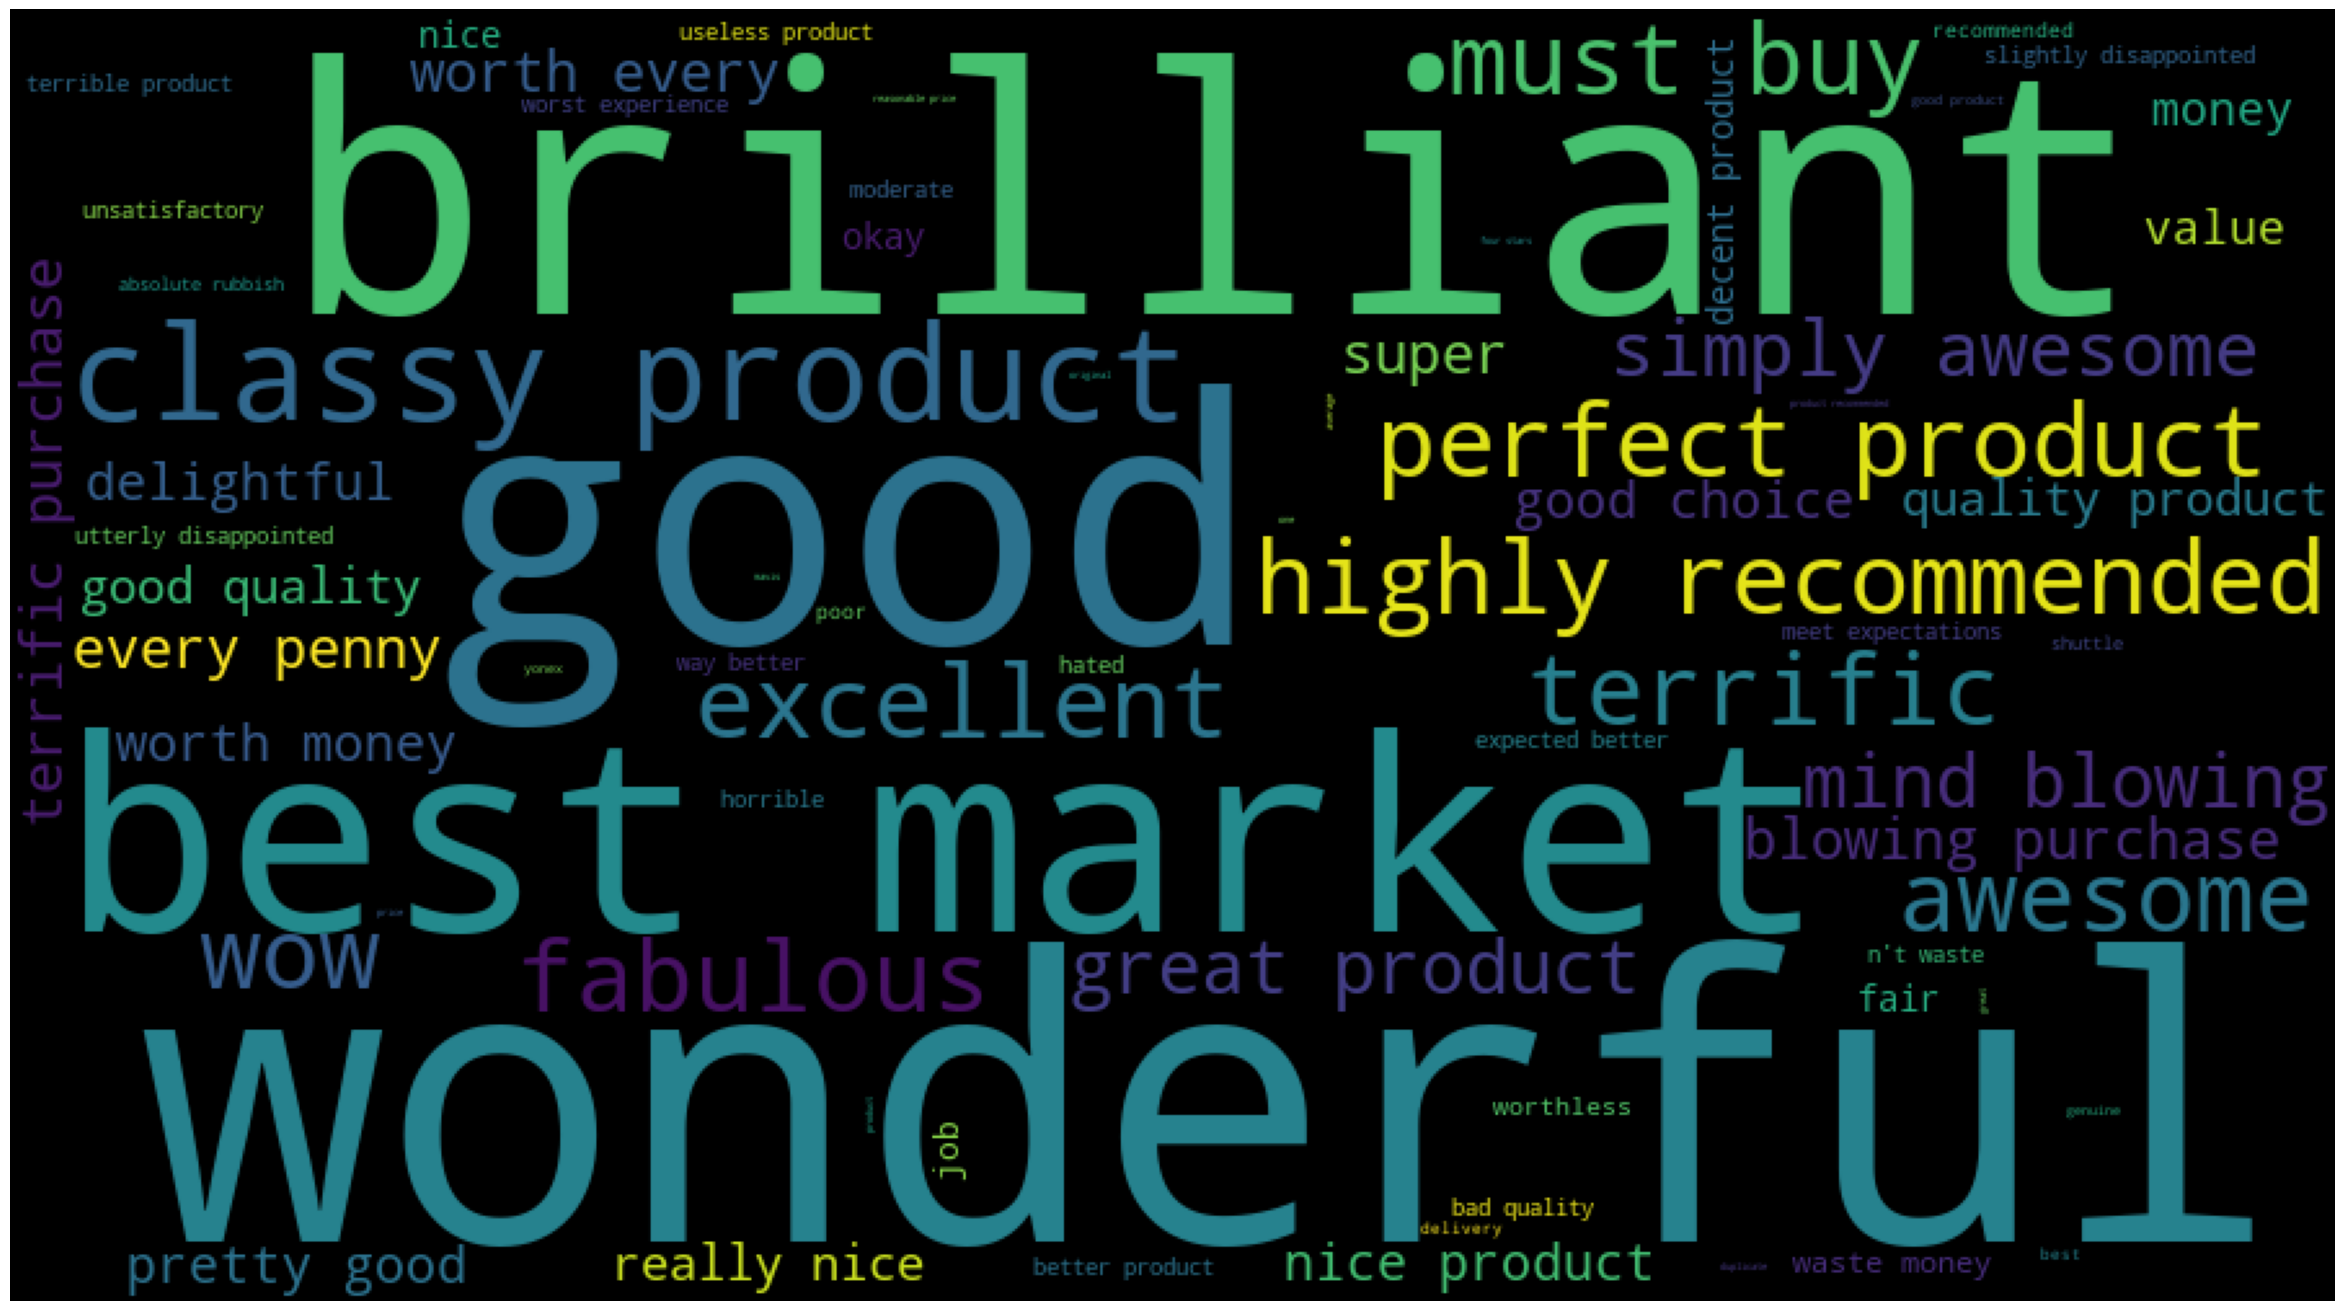

In [124]:
plt.figure(1,figsize=(30,20))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show() 

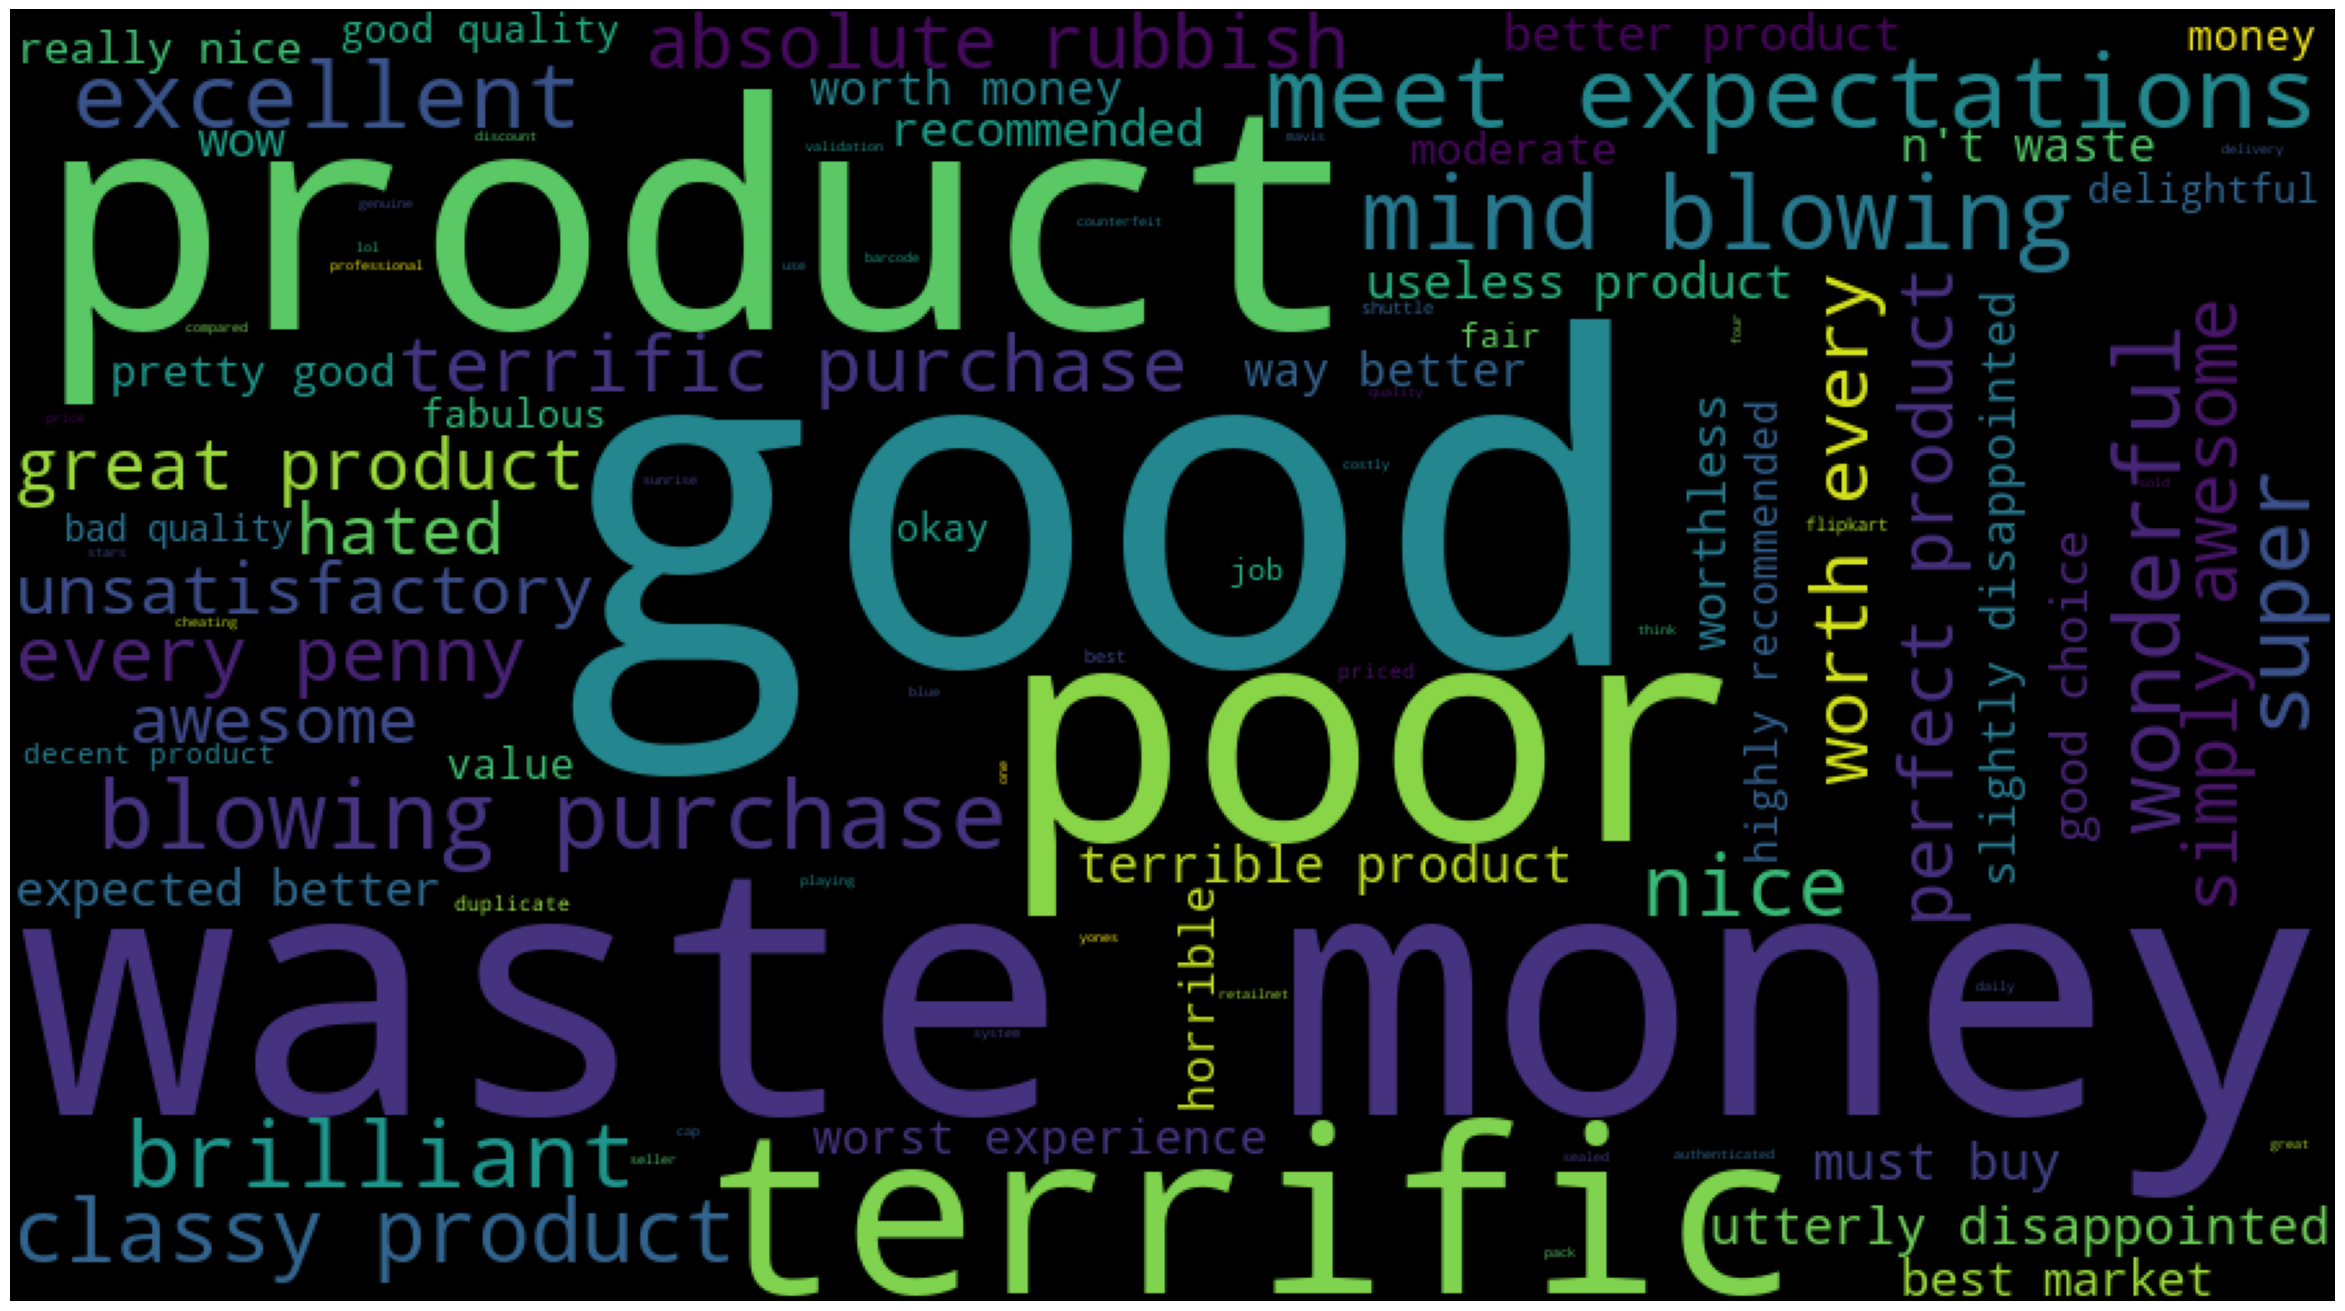

In [125]:
plt.figure(1,figsize=(30,20))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show() 

In [126]:
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes             Month  \
0   Certified Buyer, Chirakkal     889.0        64.0          Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0          Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0          Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0  unavailable 1000   
4                  unavailable     147.0        24.0          Apr 2016   

                                         Review text  Ratings City of Review  \
0  Nice product, good quality, but price is now r...        4      Chirakkal   
1  They didn't supplied Yonex Mavis 350. Outside ...        1      Hyderabad   
2  Worst product. Damaged shuttlecocks packed in ...        1     Dharmapuri   
3  Quite O. K. , but nowadays  the quality of the...        3        Chennai   
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1    unavailable   

   ReviewMonth  ReviewYear  ReviewLength Sentiment  
0          Feb        2021            37  positive  
1          Feb        2021            20  negative  
2          Apr        2021            24  negative  
3  unavailable        1000            81   neutral  
4          Apr        2016            17  negative

In [127]:
df[df["Sentiment"]=="negative"]["Review Title"] 

1          Don't waste your money
2       Did not meet expectations
4                     Over priced
13      Did not meet expectations
16        I think it is duplicate
                  ...            
8497                      Awesome
8498                  Over priced
8501               discount? lol!
8502           Costly on flipkart
8503     Yones Mavis 350 Blue cap
Name: Review Title, Length: 1071, dtype: object

In [128]:
df["Review text"].iloc[8497]

'Too much priced. It was getting me for Rs. 640 from my home town. So what is the advantage of purchasing this item from the flipkart. And i want to wait almost 5 days to get it.READ MORE'

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [130]:
from tqdm import tqdm, tqdm_notebook
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [131]:
###removing neutral sentiment 
df=df[~(df["Sentiment"]=="neutral")] 
df.shape

(7893, 13)

In [132]:
x=df[["Review text"]]
y=df["Sentiment"]

In [133]:
##applying train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6314, 1), (6314,), (1579, 1), (1579,))

In [134]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [135]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    
    return " ".join(clean_tokens)
    

In [136]:
x_train = x_train['Review text'].progress_apply(lambda x: preprocess(x))

x_train.head()

100%|█████████████████████████████████████████████████████████████████████████████| 6314/6314 [00:06<00:00, 994.43it/s]


5109    bad product poor quality really disappointedread
208                                    good expectedread
4824                                    nice productread
4622                                    good qualityread
453              shuttle nice nothing complain aboutread
Name: Review text, dtype: object

In [137]:
x_test= x_test['Review text'].progress_apply(lambda x: preprocess(x))

x_test.head()

100%|████████████████████████████████████████████████████████████████████████████| 1579/1579 [00:01<00:00, 1007.48it/s]


7188                wonderful product read
5821                              goodread
5133                     good outdoorsread
7781                              goodread
6813    recive original product thanksread
Name: Review text, dtype: object

In [138]:
import joblib
from joblib import Memory
import warnings
warnings.filterwarnings("ignore")

import os

In [139]:
##changing target feature to one hot encoding as required by f1 score
y_train=y_train.map({"positive":1,"negative":0})
y_test=y_test.map({"positive":1,"negative":0})

In [140]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)



pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(x_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(x_test, y_test)) 

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1.47 s
Wall time: 2.26 s
Score on Test Data:  0.958983666061706
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 9.08 s
Wall time: 17.9 s
Score on Test Data:  0.9507266926621765
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 3min 13s
Wall time: 6min 10s
Score on Test Data:  0.9520624303232998


In [141]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print() 

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



********** naive_bayes **********


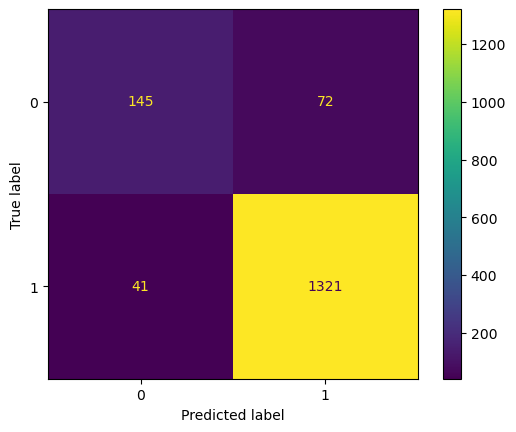

********** decision_tree **********


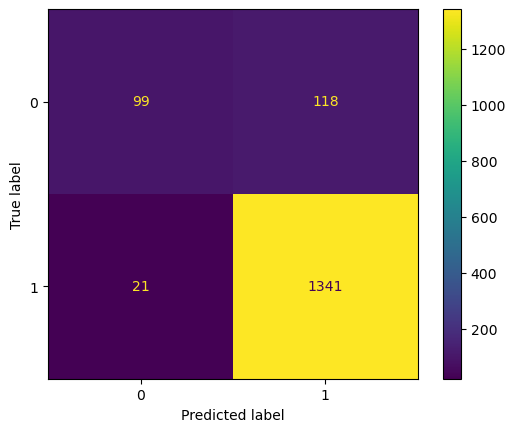

********** logistic_regression **********


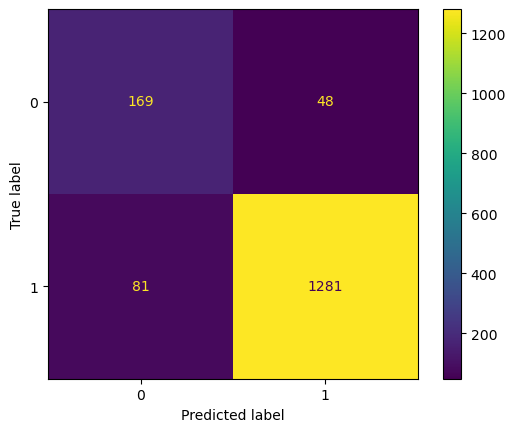

In [142]:
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    y_test_pred = model.predict(x_test)
    cm=confusion_matrix(y_test,y_test_pred)
    va=ConfusionMatrixDisplay(cm)
    va.plot() 
    plt.show() 


In [143]:
from sklearn.metrics import f1_score
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    %time y_test_pred = model.predict(x_test)
    print("Test Score (F1)",f1_score(y_test, y_test_pred))

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 0 ns
Test Score (F1) 0.958983666061706
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 7 ms
Test Score (F1) 0.9507266926621765
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 0 ns
Test Score (F1) 0.9520624303232998


In [146]:
import os
import joblib
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'best_models/{name}.pkl')
   

********** naive_bayes **********
********** decision_tree **********
********** logistic_regression **********


In [147]:
 
for name, model in best_models.items():    
    print("*"*10, name, "*"*10)
    model = joblib.load(f'best_models/{name}.pkl')
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
Model Size: 80764 Bytes
********** decision_tree **********
Model Size: 79633 Bytes
********** logistic_regression **********
Model Size: 85803 Bytes


### Selection of Model

- The F1 score for all the three best models is almost same with naive bayes having the highest f1 score among all
- The memory space occupied by the model is almost same .
- But We are choosing Ligistic **Regression Classifier** as our final model for deployment because the diagonal values in the confusion metrics is highest in this model.  

In [170]:
model.predict(["good product"])

array([1], dtype=int64)